In [24]:
import pandas as pd

passS19 = pd.read_csv("fbref/EPLSquadPass1920.csv", header=[0,1])
shotS19 = pd.read_csv("fbref/EPLSquadShooting1920.csv", header=[0,1])
scaS19 = pd.read_csv("fbref/EPLSquadSca1920.csv", header=[0,1])
passTypeS19 = pd.read_csv("fbref/EPLSquadPassType1920.csv", header=[0,1])
possessionS19 = pd.read_csv("fbref/EPLPossession1920.csv", header=[0,1])
daS19 = pd.read_csv("fbref/EPLSquadDA1920.csv", header=[0,1])

# df_all = passS19.append(shotS19)
# df_all = df_all.append(scaS19)
# df_all = df_all.append(passTypeS19)
# df_all = df_all.append(possessionS19)
# df_all = df_all.append(daS19)

def rename_columns(df):
    new_cols = []
    for col in df.columns:
        if "Unnamed:" in col[0]:
            new_cols.append(col[1])
        else:
            new_cols.append(col[0] + " " + col[1])
    return new_cols

passS19.columns = rename_columns(passS19)
shotS19.columns = rename_columns(shotS19)
scaS19.columns = rename_columns(scaS19)
passTypeS19.columns = rename_columns(passTypeS19)
possessionS19.columns = rename_columns(possessionS19)
daS19.columns = rename_columns(daS19)

# df_all.columns = rename_columns(df_all)
# print(df_all)

In [18]:
passS19Temp = passS19.copy()
passS19Temp["% Long"] = passS19Temp["Long Cmp"] / passS19Temp["Total Cmp"]
passS19Temp["% Medium"] = passS19Temp["Medium Cmp"] / passS19Temp["Total Cmp"]
passS19Temp["% Short"] = passS19Temp["Short Cmp"] / passS19Temp["Total Cmp"]
# print(passS19Temp[["Squad", "% Short", "% Medium","% Long"]])
print(passS19Temp.sort_values(by=["Prog"],ascending=False)[["Squad", "KP", "1/3", "Ast", "PPA", "CrsPA","Prog"]])

              Squad   KP   1/3  Ast  PPA  CrsPA  Prog
10  Manchester City  533  1847   68  571     96  2195
9         Liverpool  419  1633   63  487     95  2050
5           Chelsea  437  1402   43  420    101  1783
11   Manchester Utd  387  1267   42  338     50  1669
8    Leicester City  387  1223   48  318     80  1621
7           Everton  304   992   31  281     80  1591
3          Brighton  318  1063   23  305     81  1590
16        Tottenham  323  1114   38  298     50  1477
0           Arsenal  276  1094   33  311     68  1451
15      Southampton  327   944   31  298     70  1432
14    Sheffield Utd  261   980   24  291     88  1392
19           Wolves  323  1000   34  229     81  1377
1       Aston Villa  351   872   31  281     92  1365
6    Crystal Palace  244   837   19  246     53  1360
2       Bournemouth  258   878   22  252     51  1351
18         West Ham  303   918   35  246     82  1326
17          Watford  275   859   20  251     73  1305
13     Norwich City  295   8

In [180]:
scaS19Temp = scaS19.copy()
columns = ["Squad","SCA SCA","SCA Types PassLive","SCA Types PassDead",
           "SCA Types Drib","SCA Types Sh","SCA Types Fld"]
# print(scaS19Temp.sort_values(by=["SCA Types Fld"],ascending=False)[columns])
arsenal = scaS19Temp[scaS19Temp["Squad"]=="Arsenal"][columns[1:]].values[0]
print(arsenal)

[593 422  54  47  36  34]


In [182]:
sca_max = scaS19Temp[columns[1:]].max().values
print(sca_max)

[1162  903   82   88   58   56]


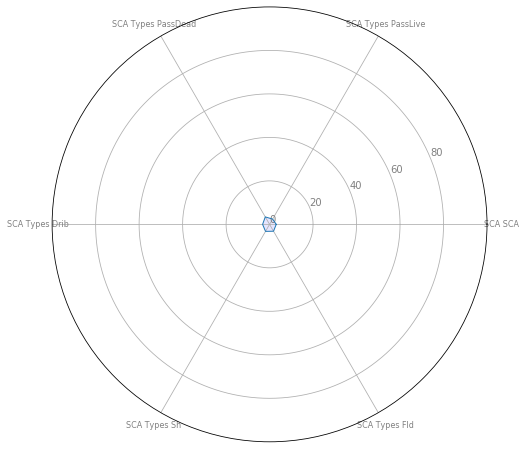

In [248]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# Set data
df = pd.DataFrame({
'group': ["a","b","c","d"],
'var1': [38, 1.5, 30, 100],
'var2': [29, 10, 9, 34],
'var3': [50, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# number of variable
# categories=list(df)[1:]
categories = columns[1:]
N = len(categories)

pArsenal = list(arsenal / sca_max * 6)
values = pArsenal + pArsenal[:1]

# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
# values=df.loc[0].drop('group').values.flatten().tolist()
# values += values[:1]
# values
# values1=df.loc[1].drop('group').values.flatten().tolist()
# values1 += values1[:1]
# values1

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [(n / float(N) * 2)* pi for n in range(N)]
angles += angles[:1]
# for i in range(N):
#     angles[i] += 0
# angles[0] += 0.

fig = plt.figure(figsize=(8,8))
fig.set_facecolor("white")
# Initialise the spider plot
ax = plt.subplot(111, polar=True,fc="white")
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
# ax.set_rlabel_position(100)
plt.yticks(list(range(0,100,20)), list(range(0,100,20)), 
           color="grey", size=10)
plt.ylim(0,100)

# lines, labels = plt.thetagrids(angles, labels=None, fmt=None, **kwargs)

# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')

# ax.set_thetagrids(angles, fontsize=12, weight="bold", color="black")

# for i,j in zip(angles[:-1],arsenal):
    # ax.annotate(str(j),xy=(i,j))
    # ax.text(i, j,"%d" %j)
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
plt.show()

Text(0, 0, 'SCA SCA')


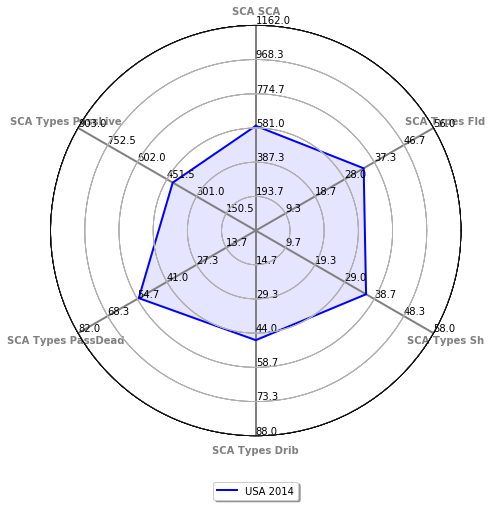

In [388]:
import numpy as np
import pylab as pl


class Radar(object):
    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]
    
        self.n = len(titles)
        self.angles = [a if a <=360. else a - 360. for a in np.arange(90, 90+360, 360.0/self.n)]
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]
    
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, 
                               fontsize=10, weight="bold", 
                               color="grey")
        # self.ax.set_theta_offset(pi)
    
        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
            self.ax.yaxis.grid(False)
        
        i=0
        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 7), labels=label, angle=angle, fontsize=10)
            ax.spines["polar"].set_visible(True)
            ax.set_ylim(0, 6)  
            ax.xaxis.grid(True,color='grey',linestyle='-',lw=2)
            # ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='left')
            if (i*360.0/self.n + 90 >180) and (i*360.0/self.n + 90 <360):
                new_angle = 90 - angle +180
            else:
                new_angle = 90 - angle
            # print(str(angle) + " " + str(label) + " " + str(new_angle) +" "+str(i))
            # ax.tick_params(axis='x', labelrotation=angle-90+60)
            # ax.tick_params(axis='x', labelrotation=60)
            # print(ax.get_xticklabels()[1])
            i+=1
        
        self.axes[0].get_xticklabels()[0].set_rotation(30)
        print(self.axes[0].get_xticklabels()[0])    
    
    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        self.ax.fill(angle, values, 'b', alpha=0.1)

fig = pl.figure(figsize=(20, 20))
fig.set_facecolor("white")

# titles = [
# "Canada", "Australia", "New Zealand", "Japan", "China", "USA", "Mexico", "Finland", "Doha" 
# ]

titles = columns[1:]

# labels = [
# list("abcde"), list("12345"), list("uvwxy"), 
# [" ", " ", "$156", "$158", "$160"],
# list("jklmn"), list("asdfg"), list("qwert"), [" ", "4.3", "4.4", "4.5", "4.6"], list("abcde")
# ]

labels = []
for col in sca_max:
    temp = []
    for i in range(0,6):
        temp.append(np.around(col/6 * (i+1),1))
    labels.append(temp)

radar = Radar(fig, titles, labels)
radar.plot(values[:-1],  "-", lw=2, color="b", alpha=1, label="USA 2014")
# radar.plot([2.3, 2, 3, 3, 2, 3, 2, 4, 2],"-", lw=1, color="r", alpha=1, label="2014")
# radar.plot([3, 4, 3, 4, 2, 2, 1, 3, 2], "-", lw=1, color="g", alpha=1, label="2013")
# radar.plot([4.5, 5, 4, 5, 3, 3, 4, 4, 2], "-", lw=1, color="y", alpha=1, label="2012")

radar.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
      fancybox=True, shadow=True, ncol=4)

fig = plt.gcf()
fig.set_size_inches(6, 10, forward=True)
# fig.savefig('test2png.png', dpi=100, bbox_inches="tight", pad_inches=1)